In [1]:
# data manipulation imports
import numpy as np
import pandas as pd

# data saving imports
import pickle
import os

# custom imports
from regression_class import LogisticRegression as logreg
from regression_class import TimestampClass

In [2]:
# infiles
regression_infile = "regression_thread_data.p"
thread_infile = 'clean_5_thread_data.p'

# outfiles
outdir = 'feature_selection_larger_collection_window'
metrics_outfile = "regression_metrics"


In [3]:
# params
X_COLS = [
    'sentiment_sign', 'sentiment_magnitude', 'hour', 'num_dayofweek','activity_ratio',
    'mean_author_sentiment_sign', 'mean_author_sentiment_magnitude', 'log_author_all_activity_count',
    ]

# regression params dict
regression_params = {
    'collection_window': 14,
    'validation_window': 7,
    'FSS': True,
    'performance_scoring_method': 'roc_auc',
    'x_cols': X_COLS,
    'y_col': 'success',
    'metrics': ['roc_auc', 'aic'],
    #'activity_threshold': 2,
}

In [4]:
# make out params df to save to spreadsheet
out_params = {}
out_params['regression_infile'] = regression_infile
out_params['thread_infile'] = thread_infile

# make out directory
if not os.path.isdir(outdir):
    os.mkdir(outdir)


In [5]:
# read in files
regression_df = pickle.load(open(regression_infile, 'rb'))
thread_df = pickle.load(open(thread_infile, 'rb'))

In [6]:
# place to store logregs
subreddit_logregs = {}

# go through subreddits and run regressions
#for subreddit in regression_df:
for subreddit in ['books']:
    print(f'###{subreddit}###')
    regression_params['name'] = subreddit
    regression_params['regression_data'] = regression_df[subreddit]
    regression_params['thread_data'] = thread_df[subreddit]

    subreddit_logregs[subreddit] = logreg(regression_params)
    subreddit_logregs[subreddit].main()

###books###
# Period 1 #
Running FSS
Model 1
Optimization terminated successfully.
         Current function value: 0.630312
         Iterations 5
Model 2
Optimization terminated successfully.
         Current function value: 0.629502
         Iterations 5
Model 3
Optimization terminated successfully.
         Current function value: 0.627126
         Iterations 5
Model 4
Optimization terminated successfully.
         Current function value: 0.626495
         Iterations 5
Model 5
Optimization terminated successfully.
         Current function value: 0.625898
         Iterations 5
Model 6
Optimization terminated successfully.
         Current function value: 0.625063
         Iterations 5
Model 7
Optimization terminated successfully.
         Current function value: 0.625057
         Iterations 5
Model 8
Optimization terminated successfully.
         Current function value: 0.625029
         Iterations 5


/home/cara/anaconda3/envs/redditenv/lib/python3.10/site-packages/numpy/core/_methods.py:269: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/cara/anaconda3/envs/redditenv/lib/python3.10/site-packages/numpy/core/_methods.py:261: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/home/cara/anaconda3/envs/redditenv/lib/python3.10/site-packages/numpy/core/_methods.py:269: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/cara/anaconda3/envs/redditenv/lib/python3.10/site-packages/numpy/core/_methods.py:261: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


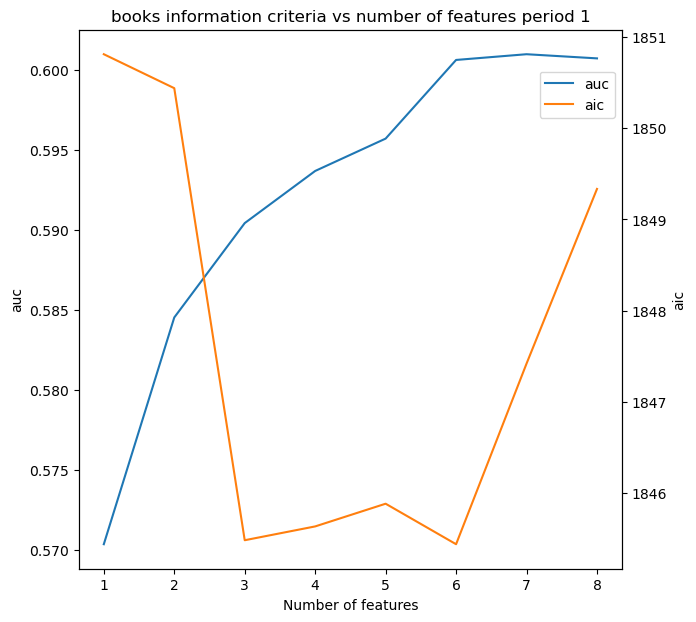

In [7]:
for subreddit in subreddit_logregs:
    for period in subreddit_logregs[subreddit].regression_metrics:
        subreddit_logregs[subreddit].plot_metrics_vs_features_one_period(
            period, ['auc', 'aic'], name=f"{subreddit}", legend_loc=(0.9,0.83),
            outfile=f"{outdir}/{subreddit}_p{period}"
            )

In [8]:
for subreddit in subreddit_logregs:
    subreddit_logregs[subreddit].get_FSS_metrics_df()

In [9]:
for subreddit in subreddit_logregs:
    subreddit_outfile = f"{outdir}/{subreddit}_{metrics_outfile}.xlsx"

    subreddit_logregs[subreddit].output_to_excel(subreddit_outfile, params_to_add=out_params)

In [43]:
pickle.dump(subreddit_logregs, open(f"{outdir}/all_logregs.p", 'wb'))

In [8]:
subreddit_logregs = pickle.load(open(f"{outdir}/all_logregs.p", 'rb'))